In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from tensorflow import keras
import pickle

In [2]:
from google.colab import drive
drive.mount('/content/drive')

with open('/content/drive/My Drive/ai_project/data/f10-7.pkl', 'rb') as f:
    df = pickle.load(f)

Mounted at /content/drive


In [57]:
n = 10
t_num = 50

In [27]:
X = np.array([df['value'].values[i:i+n] for i in range(len(df)-n)])
y = np.array([df['value'].values[i+n] for i in range(len(df)-n)])

In [28]:
len(X), len(y)

(25979, 25979)

In [29]:
X.shape, y.shape

((25979, 10), (25979,))

In [30]:
X = X.reshape((X.shape[0], X.shape[1], 1))

In [58]:
X_test, y_test = X[-t_num:], y[-t_num:]

In [32]:
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import Dense, Embedding, SimpleRNN, LSTM, GRU

In [33]:
X_train, X_val, y_train, y_val = train_test_split(np.array(X[:-n]), np.array(y[:-n]), test_size=0.2, random_state=42)

In [34]:
X_train.shape, X_val.shape, y_train.shape, y_val.shape

((20775, 10, 1), (5194, 10, 1), (20775,), (5194,))

In [35]:
def plot_result(his):
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 4))
    ax1.plot(his.history['loss'])
    ax1.plot(his.history['val_loss'])
    ax1.set_title('Model Loss')
    ax1.set_ylabel('Loss')
    ax1.set_xlabel('Epoch')
    ax1.legend(['Train', 'Validation'], loc='upper right')

    ax2.plot(his.history['mae'])
    ax2.plot(his.history['val_mae'])
    ax2.set_title('Model MAE')
    ax2.set_ylabel('MAE')
    ax2.set_xlabel('Epoch')
    ax2.legend(['Train', 'Validation'], loc='upper right')

    plt.show()

In [36]:
def make_pred(num, model):
    data_pred = np.array(df['value'].values[:-n])
    for i in range(num):
        temp = data_pred[-n:]
        pred = model.predict(temp.reshape(1, -1))
        data_pred = np.append(data_pred, pred)
    return data_pred[-num:]

In [48]:
model1 = Sequential()
# model1.add(SimpleRNN(200, dropout=0.2, recurrent_dropout=0.2))
model1.add(LSTM(100, return_sequences=True, input_shape=[None, 1]))
# model1.add(GRU(20, input_shape=[None, 1]))
model1.add(LSTM(80, return_sequences=True))
model1.add(LSTM(50))
model1.add(Dense(1))

model1.compile(loss='mse', optimizer='adam', metrics=['mae'])

model1.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_9 (LSTM)               (None, None, 100)         40800     
                                                                 
 lstm_10 (LSTM)              (None, None, 80)          57920     
                                                                 
 lstm_11 (LSTM)              (None, 50)                26200     
                                                                 
 dense_4 (Dense)             (None, 1)                 51        
                                                                 
Total params: 124971 (488.17 KB)
Trainable params: 124971 (488.17 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [49]:
history1 = model1.fit(X_train, y_train,
                    epochs=100,
                    batch_size=32,
                    validation_data=(X_val, y_val),
                    verbose=1)

Epoch 1/100
650/650 [==============================] - 11s 10ms/step - loss: 12801.8066 - mae: 99.2995 - val_loss: 9938.4844 - val_mae: 83.8047
Epoch 2/100
650/650 [==============================] - 5s 8ms/step - loss: 7791.6396 - mae: 70.0247 - val_loss: 6210.8389 - val_mae: 57.4657
Epoch 3/100
650/650 [==============================] - 5s 8ms/step - loss: 4996.5962 - mae: 49.9242 - val_loss: 4215.1675 - val_mae: 46.0228
Epoch 4/100
650/650 [==============================] - 6s 9ms/step - loss: 3597.4058 - mae: 43.5758 - val_loss: 3307.2773 - val_mae: 43.3908
Epoch 5/100
650/650 [==============================] - 5s 8ms/step - loss: 3028.1082 - mae: 42.5066 - val_loss: 2993.0117 - val_mae: 43.4759
Epoch 6/100
650/650 [==============================] - 5s 8ms/step - loss: 2234.4146 - mae: 31.0257 - val_loss: 1590.9779 - val_mae: 20.7920
Epoch 7/100
650/650 [==============================] - 5s 8ms/step - loss: 1214.5564 - mae: 17.5001 - val_loss: 991.0707 - val_mae: 15.3690
Epoch 8/100

In [50]:
def plot_result(his):
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 4))
    ax1.plot(his.history['loss'])
    ax1.plot(his.history['val_loss'])
    ax1.set_title('Model Loss')
    ax1.set_ylabel('Loss')
    ax1.set_xlabel('Epoch')
    ax1.legend(['Train', 'Validation'], loc='upper right')

    ax2.plot(his.history['mae'])
    ax2.plot(his.history['val_mae'])
    ax2.set_title('Model MAE')
    ax2.set_ylabel('MAE')
    ax2.set_xlabel('Epoch')
    ax2.legend(['Train', 'Validation'], loc='upper right')

    plt.show()

def make_pred(num, model):
    data_pred = np.array(df['value'].values[:-t_num])
    for i in range(num):
        temp = data_pred[-n:]
        pred = model.predict(temp.reshape(1, -1), verbose=0)
        data_pred = np.append(data_pred, pred)
    return data_pred[-num:]

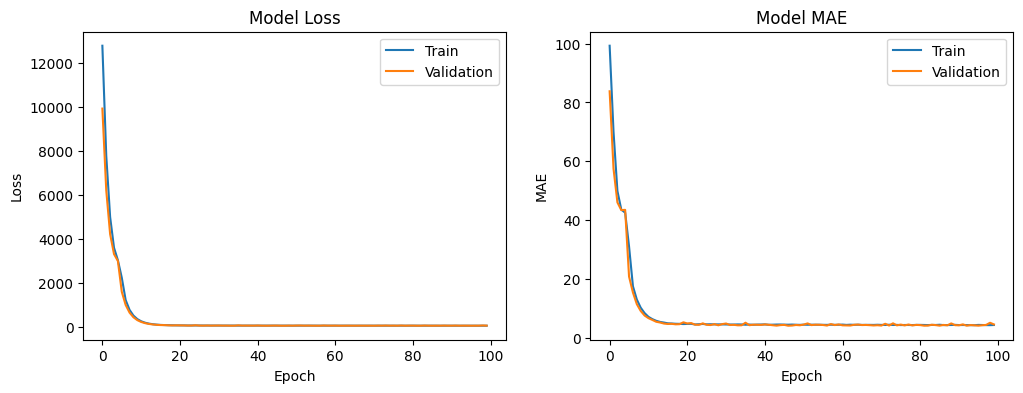

In [51]:
plot_result(history1)

In [62]:
pred_num = 50
pred1 = make_pred(pred_num, model1)

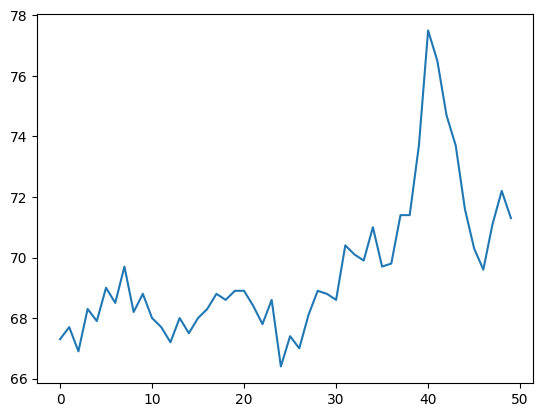

In [63]:
plt.plot(y_test[:pred_num])

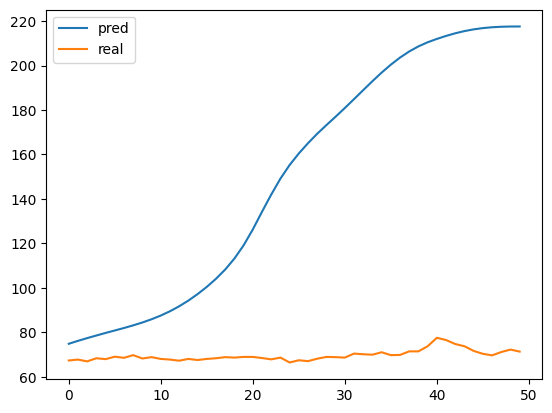

In [64]:
plt.plot(pred1, label='pred')
plt.plot(y_test[:pred_num], label='real')
plt.legend()

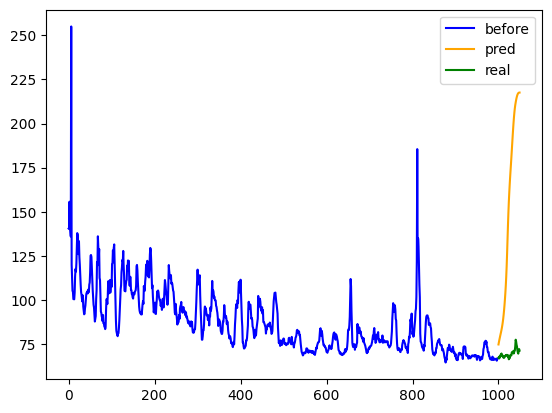

In [68]:
left_num = 1000
plt.plot(df['value'].values[-left_num-t_num:-t_num], label='before', color='blue')
plt.plot(range(left_num, left_num+pred_num), pred1, label='pred', color='orange')
plt.plot(range(left_num, left_num+pred_num), y_test, label='real', color='green')
plt.legend()